In [1]:
import numpy as np
import matplotlib.pyplot as plt
# from scinet import *
import ed_quantum as edq

## Train models



### Parameters
- `latent_size:` between 0 and 9
- `input_size: 30`
- `input2_size: 30`
- `output_size: 1`
- `encoder_num_units`: [300, 100]
- other parameters: default values
### Data
Both the qubit and the projection axis are specified by 30 random projective measurements.
- training data: 490000 samples
- validation data: 10000 samples

### Training
For each latent size, eight training runs are performed and the one with the lowest error is chosen. Each training run is performed in two steps:
    1. `epoch_num: 250`, `batch_size: 512`, `learning_rate: 1e-3`, `beta: 1e-5`
    2. `epoch_num: 50`, `batch_size: 512`, `learning_rate: 1e-4`, `beta: 1e-5`
    
### Naming scheme
The models are named 'two_qubits_label_s_i', where label is 'comp' (for tomographically complete) or '*n*dim_incomp' (for tomographically incomplete with *n* orhtogonal projectors), 's' is the number of latent neurons and 'i' is the run. 

In [2]:
# for inc_tom_m1 in [2, 3, False]:
#     if inc_tom_m1 is False:
#         label = 'comp'
#     elif inc_tom_m1 == 2:
#         label = '2dim_incomp'
#     elif inc_tom_m1 == 3:
#         label = '3dim_incomp'
#     dataset_name = 'two_qubits_{}'.format(label)
#     edq.create_data(2, 30, 30, 500000, dataset_name, incomplete_tomography=[inc_tom_m1, False])
#     td, vd, ts, vs, projectors = dl.load(2, dataset_name)
#     for s in range(10):
#         for i in range(3):
#             print "Tomography case:", label
#             print "Running iteration ", i
#             print 'Using {} latent neurons'.format(s)
#             name = 'two_qubits_{}_{}_{}'.format(label, s, i)
#             net = nn.Network(30, s, 30, 1, name=name, encoder_num_units=[300, 100], decoder_num_units=[100, 100])
#             net.train(250, 512, 1e-3, td, vd, beta_fun=lambda x: 1.e-5, test_step=10)
#             net.train(50, 512, 1e-4, td, vd, beta_fun=lambda x: 1.e-5, test_step=10)
#             net.save(name)
#             ra = net.run(vd, net.recon_loss)
#             print "Error: ", ra

In [3]:
import data_loader as dl

In [4]:
import model as nn

## Load trained models

In [5]:
err = []
for label in ['2dim_incomp', '3dim_incomp', 'comp']:
    err_label = []
    for i in range(3):
        # if you have downloaded the validation data set from the link above:
        td, vd, ts, vs, projectors = dl.load(100, 'two_qubits_{}_validation'.format(label))
        # if you have generated your own data set and trained the networks with it:
        # td, vd, ts, vs, projectors = dl.load(2, 'two_qubits_{}'.format(label))
        err_i = []
        for s in range(10):
            name = 'two_qubits_{}_{}_{}'.format(label, s, i)
            net = nn.Network.from_saved(name)
            err_i.append(np.sqrt(net.run(vd, net.recon_loss)))
        err_label.append(err_i)
    err.append(err_label)
err_min = np.array(err).min(axis=1)

{'decoder_num_units': [100, 100], 'input2_size': 30, 'tot_epochs': 300, 'latent_size': 0, 'output_size': 1, 'encoder_num_units': [300, 100], 'input_size': 30, 'name': 'two_qubits_2dim_incomp_0_0', 'load_file': 'two_qubits_2dim_incomp_0_0'}
INFO:tensorflow:Restoring parameters from /Users/karthikeyavadlamudi/Desktop/tf_save/two_qubits_2dim_incomp_0_0.ckpt
Loaded network from file two_qubits_2dim_incomp_0_0
{'decoder_num_units': [100, 100], 'input2_size': 30, 'tot_epochs': 300, 'latent_size': 1, 'output_size': 1, 'encoder_num_units': [300, 100], 'input_size': 30, 'name': 'two_qubits_2dim_incomp_1_0', 'load_file': 'two_qubits_2dim_incomp_1_0'}
INFO:tensorflow:Restoring parameters from /Users/karthikeyavadlamudi/Desktop/tf_save/two_qubits_2dim_incomp_1_0.ckpt
Loaded network from file two_qubits_2dim_incomp_1_0
{'decoder_num_units': [100, 100], 'input2_size': 30, 'tot_epochs': 300, 'latent_size': 2, 'output_size': 1, 'encoder_num_units': [300, 100], 'input_size': 30, 'name': 'two_qubits_2di

/var/folders/p1/30f2ykrs7m9fhxg6dmb9_ryr0000gn/T/ipykernel_35024/3092457794.py:23: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


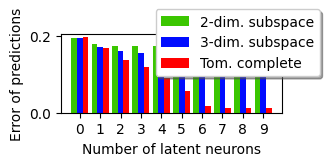

In [7]:
latent_neurons = np.arange(10)
blue_color='#000cff'
orange_color='#FF0000'
green_color='#3bc600'
fig = plt.figure(figsize=(3.4, 2.1))
ax = fig.add_subplot(111)
width = 0.28
ax.bar(latent_neurons - width, err_min[0], width=width, label='2-dim. subspace', color=green_color)
ax.bar(latent_neurons, err_min[1], width=width, label='3-dim. subspace', color=blue_color)
ax.bar(latent_neurons + width, err_min[2], width=width, label='Tom. complete', color=orange_color)
ax.legend()
ax.set_xticks(latent_neurons)
ax.set_xlabel('Number of latent neurons')
ax.set_ylabel('Error of predictions')
handles, labels = ax.get_legend_handles_labels()

min_err_index = np.argmin(np.mean(err_min, axis=1))
optimal_neurons = latent_neurons[min_err_index]
# print("Optimal latent neurons:", optimal_neurons)

lgd=ax.legend(handles, labels,loc='upper center', bbox_to_anchor=(0.8, 1.40), shadow=True, ncol=1)
fig.tight_layout()
fig.show()